[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Processing Book melville-moby_dick.txt


100%|██████████| 136/136 [00:29<00:00,  4.57it/s]


Below are the means of each chapter:
 Chapter 0: 4.843278217109993
 Chapter 1: 4.670135275754422
 Chapter 2: 4.612093261593646
 Chapter 3: 4.916426512968299
 Chapter 4: 4.81563126252505
 Chapter 5: 5.086655112651647
 Chapter 6: 5.0112903225806456
 Chapter 7: 5.02668759811617
 Chapter 8: 4.467722289890378
 Chapter 9: 4.958077709611452
 Chapter 10: 5.088669950738916
 Chapter 11: 4.676975945017182
 Chapter 12: 4.6985049833887045
 Chapter 13: 4.8396039603960395
 Chapter 14: 4.534502923976608
 Chapter 15: 4.49165402124431
 Chapter 16: 4.457854406130268
 Chapter 17: 4.219004524886878
 Chapter 18: 3.8186695278969958
 Chapter 19: 4.877966101694915
 Chapter 20: 4.051339285714286
 Chapter 21: 4.326907630522088
 Chapter 22: 4.767857142857143
 Chapter 23: 5.25278810408922
 Chapter 24: 4.802030456852792
 Chapter 25: 4.958333333333333
 Chapter 26: 5.0238532110091745
 Chapter 27: 5.046038543897216
 Chapter 28: 4.241540256709452
 Chapter 29: 4.437185929648241
 Chapter 30: 3.5481481481481483
 Chapter 3

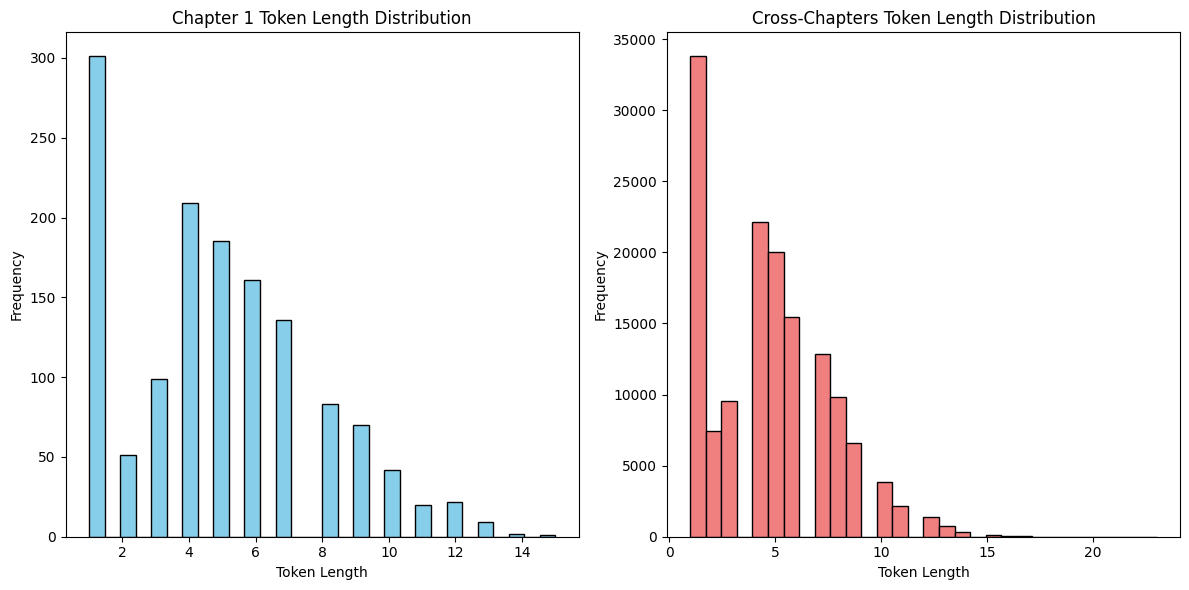

Processing Book austen-sense.txt


100%|██████████| 50/50 [00:17<00:00,  2.80it/s]


Below are the means of each chapter:
 Chapter 0: 5.135135135135135
 Chapter 1: 4.637945318972659
 Chapter 2: 5.154006243496358
 Chapter 3: 5.190476190476191
 Chapter 4: 5.403035413153457
 Chapter 5: 5.198709677419354
 Chapter 6: 5.401315789473684
 Chapter 7: 5.113031914893617
 Chapter 8: 4.829226847918437
 Chapter 9: 5.2027863777089784
 Chapter 10: 5.463529411764706
 Chapter 11: 4.7747306562193925
 Chapter 12: 4.2684931506849315
 Chapter 13: 4.986754966887418
 Chapter 14: 4.991390728476821
 Chapter 15: 4.826185101580135
 Chapter 16: 4.434595524956971
 Chapter 17: 4.856858846918489
 Chapter 18: 4.677920685959271
 Chapter 19: 4.203692307692307
 Chapter 20: 4.841052631578948
 Chapter 21: 4.623212321232123
 Chapter 22: 5.2693389592123765
 Chapter 23: 4.764570552147239
 Chapter 24: 4.966893039049236
 Chapter 25: 5.079714841218406
 Chapter 26: 4.85997521685254
 Chapter 27: 5.076838638858398
 Chapter 28: 4.589859851607584
 Chapter 29: 4.3544494720965305
 Chapter 30: 4.8506884681583475
 Chapte

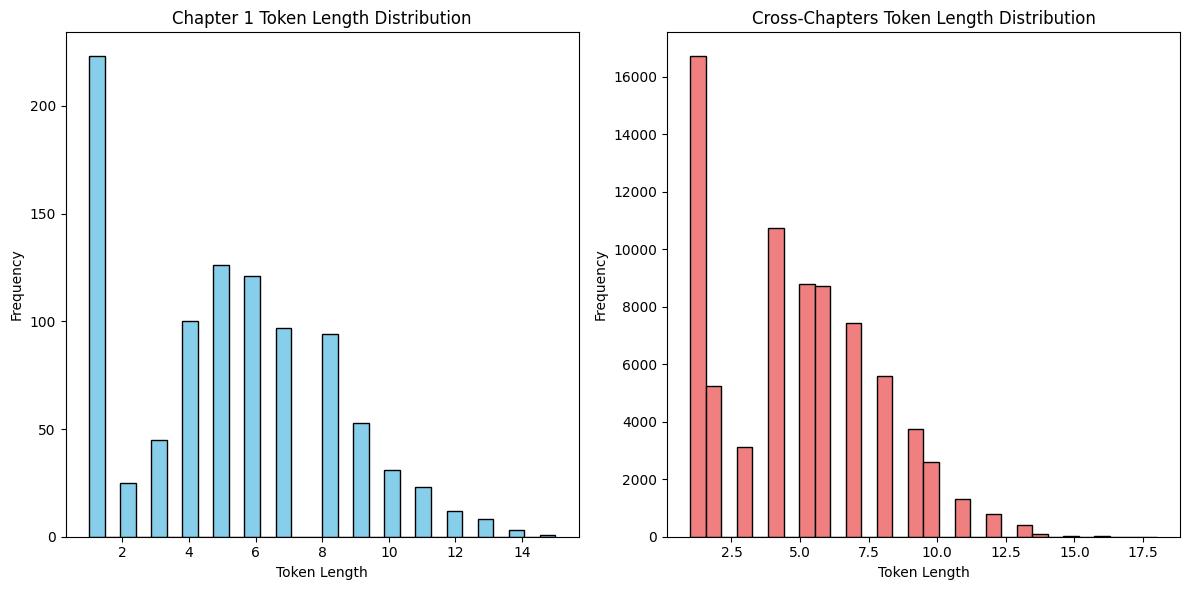

In [1]:
"""

3.	We want to comprehend the length of tokens in each chapter of the book.
Calculate the mean, standard deviation and kurtosis of length of tokens in
each chapter, excluding stopwords.  Write a script that draws the histogram
of token length within same chapter and another one illustrating the
cross-chapters distribution.


We want to comprehend the length of tokens in each chapter of the book.
Calculate the mean, standard deviation and kurtosis of length of
tokens in each chapter, excluding stopwords.
Write a script that draws the histogram of token length within same
chapter and another one illustrating the cross-chapters distribution.


Understanding:
First we need to select the text from the corpus and then select the select and remove the stop words.
Then we need to split the the text in each chapter and we need to calculate these following:
i) Mean
ii) Standard deviation
iii) Kurtosis length

Then draw the histogram of any chapter and token length inside the chapter.
Then draw the histogram of token length for cross-chapters distribution.

Challenges:
How we can split the chapter because we don't know how we can split the chapters.

Standard Deviation tells you how your data spreads out from the mean, giving you an idea of the overall variability.
Kurtosis tells you about the data's distribution in the tails or extreme ends compared to the mean,
whether it has more extreme values (positive kurtosis) or fewer (negative kurtosis).
The mean in a dataset is the average value, calculated by summing all data points and dividing by the number of points.

"""



!pip install nltk
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install tqdm

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('gutenberg')
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy.stats import kurtosis
from nltk.corpus import gutenberg
from tqdm import tqdm

# Load the book text

def processing_task_03(book_id):
    book_text = gutenberg.raw(book_id)
    # Define a function to calculate token length
    def get_token_length(text):
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
        return [len(word) for word in filtered_tokens]


    # Split the book into chapters
    chapters = re.split(r'CHAPTER \d+', book_text)[1:]

    # Initialize lists to store token lengths
    chapter_lengths = []
    all_lengths = []
    count = 0
    # Calculate token lengths for each chapter
    for chapter in tqdm(chapters):
        # getting length of words (len(word)=4) in each chapter.
        lengths = get_token_length(chapter)
        chapter_lengths.append(lengths)
        all_lengths.extend(lengths)
        count += 1

    # Calculate mean, standard deviation, and kurtosis
    print('Below are the means of each chapter:')
    chapter_means = [np.mean(lengths) for lengths in chapter_lengths]
    for chapter, chapter_mean in enumerate(chapter_means):
        print(f" Chapter {chapter}: {chapter_mean}")
    chapter_stddevs = [np.std(lengths) for lengths in chapter_lengths]
    print('Below are the standard deviation of each chapter:')
    for chapter, chapter_stddev in enumerate(chapter_stddevs):
        print(f" Chapter {chapter}: {chapter_stddev}")
    chapter_kurtosis = [kurtosis(lengths) for lengths in chapter_lengths]
    print('Below are the kurtosi of each chapter:')
    for chapter, chapter_kurtosi in enumerate(chapter_kurtosis):
        print(f"Chapter {chapter}: {chapter_kurtosi}")

    all_mean = np.mean(all_lengths)
    all_stddev = np.std(all_lengths)
    all_kurt = kurtosis(all_lengths)
    print(f"All Mean:{all_mean}")
    print(f"Al Stddev:{all_stddev}")
    print(f"All kurt:{all_kurt}")

    # Create a histogram for the same chapter and cross-chapters distribution
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(chapter_lengths[0], bins=30, color='skyblue', edgecolor='black')
    plt.title('Chapter 1 Token Length Distribution')
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(all_lengths, bins=30, color='lightcoral', edgecolor='black')
    plt.title('Cross-Chapters Token Length Distribution')
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
print(f"Processing Book melville-moby_dick.txt")
processing_task_03('melville-moby_dick.txt')
print(f"Processing Book austen-sense.txt")
processing_task_03('austen-sense.txt')




